# Project 6: Online Retail Analysis


# Prefactory Remarks

- [x] **Create a virtual environment to download the packages**

In [ ]:
# You don't have to do this, it's just safer.

# Install virtualenv (virtual environment):

# !pip install virtualenv

# Create a virtual environment named "myenv":

# !python -m venv myenv

# Activate the virtual environment:

# myenv\Scripts\activate (Windows)
# source myenv/bin/activate (macOS/Linux)

# Upgrade pip and install essential data science libraries inside the virtual environment:

# !myenv/bin/python -m pip install --upgrade pip  
# !myenv/bin/python -m pip install numpy pandas matplotlib seaborn scikit-learn scipy statsmodels jupyterlab plotly openpyxl xlrd tensorflow keras torch torchvision pyspark ipykernel

# Add the virtual environment as a Jupyter kernel:

# !myenv/bin/python -m ipykernel install --user --name=myenv --display-name "Python (myenv)"

# Deactivate the virtual environment (Run this in the terminal):

# deactivate

- [x] **Libraries we might need to install or upgrade**

In [ ]:
# If you don't care to create a virtual environment, here is what you need to do to download the libraries

# Run these directly in a cell to download the libraries:

#!pip install tensorflow
#!pip install pyspark
#!pip install scikit-optimize (for skopt)
#!pip install missingno
#!pip install seaborn
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install scikit-learn

# To update them, run this (with your desired library):

#!pip install --upgrade scikit-learn

- [x] **Tips for rearranging your Notebook**

- Hold ctrl+shift and click on the various cells you want to move, then press the arrow keys to move them up or down.

# Data Analysis (Using the Pandas Library)

## 1. Visualize the data

- [x] **View the data**

In [1]:
import pandas as pd
import numpy as np
import math as ma
import re
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("online_retail.csv")

df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/9/2010 20:01,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/9/2010 20:01,3.75,17530.0,United Kingdom


- [x] **Check the data types**

In [22]:
df.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

- [x] **Check the information of the dataset using the info statement.**

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


- [x] **Check the value counts for each column**

In [48]:
df["Country"].value_counts()

Country
United Kingdom          485852
EIRE                      9670
Germany                   8129
France                    5772
Netherlands               2769
Spain                     1278
Switzerland               1187
Portugal                  1101
Belgium                   1054
Channel Islands            906
Sweden                     902
Italy                      731
Australia                  654
Cyprus                     554
Austria                    537
Greece                     517
United Arab Emirates       432
Denmark                    428
Norway                     369
Finland                    354
Unspecified                310
USA                        244
Japan                      224
Poland                     194
Malta                      172
Lithuania                  154
Singapore                  117
RSA                        111
Bahrain                    107
Canada                      77
Hong Kong                   76
Thailand                    76


## 2. Reorganizing and Cleaning the Data

- [x] **Check for erronious values if there are any.**

In [204]:
df["Country"].value_counts()
df["Price"].value_counts()
df["Quantity"].value_counts()

# Some quantity values are negative

df['Quantity'] = df['Quantity'].abs()
df["Quantity"].value_counts()

# The same goes for price

df['Price'] = df['Price'].abs()
df["Price"].value_counts()

Price
1.25      53932
0.85      40721
2.95      38094
1.65      35627
2.10      24701
          ...  
864.59        1
194.12        1
6.85          1
172.21        1
85.79         1
Name: count, Length: 1606, dtype: int64

- [x] **Check for NaN values in all of the columns. Use imputation (filling the NaN slots with the mean of the values available for that column) to fill the NaN slots.**

In [57]:
not_numbers = {}

for column in df.columns:
    not_numbers[column] = df[column].isna().sum()

print(not_numbers)

{'Invoice': 0, 'StockCode': 0, 'Description': 2928, 'Quantity': 0, 'InvoiceDate': 0, 'Price': 0, 'Customer ID': 107927, 'Country': 0, 'Country_encoded': 0, 'Revenue Class': 0}


- [x] **Check for missing values (empty slots). Use imputation (filling the NaN slots with the mean of the values available for that column) to fill the NaN slots.**

In [61]:
empty_values = {}

for column in df.columns:
    empty_values[column] = (df[column] == "").sum()

print(empty_values)

{'Invoice': 0, 'StockCode': 0, 'Description': 0, 'Quantity': 0, 'InvoiceDate': 0, 'Price': 0, 'Customer ID': 0, 'Country': 0, 'Country_encoded': 0, 'Revenue Class': 0}


- [x] **Rename the columns.**

In [5]:
df.rename(columns={"InvoiceDate" : "Invoice_Date"}, inplace=True)

df.rename(columns={"Customer ID" : "Customer_ID"}, inplace=True)

df

,Invoice,StockCode,Description,Quantity,Invoice_Date,Price,Customer_ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/9/2010 20:01,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/9/2010 20:01,3.75,17530.0,United Kingdom


- [x] **Fix the invoice date column by separating it into date and time.**

In [7]:
df['Invoice_Date'] = pd.to_datetime(df['Invoice_Date'])

df['Date'] = df['Invoice_Date'].dt.date  # Returns date as an object (YYYY-MM-DD)

df['Time'] = df['Invoice_Date'].dt.time  # Returns time as an object (HH:MM:SS)

# Now, we convert the Date column to datetime format:

df['Date']= pd.to_datetime(df['Date'])

df.dtypes

Invoice                 object
StockCode               object
Description             object
Quantity                 int64
Invoice_Date    datetime64[ns]
Price                  float64
Customer_ID            float64
Country                 object
Date            datetime64[ns]
Time                    object
dtype: object

- [x] **After all of this cleaning, have we lost any data? If yes, how much?**

In [214]:
df_1 = pd.read_csv("online_retail.csv")

percent_data = len(df)/len(df_1)
percent_data

# We lost nothing, as expected

1.0

## 3. String Manipulation

We will implement some specific domain knowledge about stock codes:

* **Alpha-Numeric Codes (e.g., 85123A, 85099B):**
    * Letters often indicate product variations (color, size, material).
    * Analyze variations to optimize inventory and marketing.
* **Numeric Codes (e.g., 22423, 21212):**
    * Standard product identifiers.
    * Cross-reference with product descriptions for detailed analysis.
* **Code Length (5 Digits):**
    * May represent a specific product category or range.
    * Analyze category performance.
* **"PAD" in Stock Codes:**
    * "PAD" could signify:
        * Padded items (e.g., cushions, packaging).
        * Promotional add-ons.
        * Parts and accessories.
        * Point-of-sale advertising displays.
    * Business Implications:
        * If it is padded items, then it is important to track sales and inventory of those items.
        * If it is promotional add-ons, then track the effectiveness of the promotion.
        * If it is parts and accessories, then track what main products they are sold with.
        * If it is point-of-sale advertising displays, then track the effectiveness of those displays.
    
* **Quantity/Sales Velocity**
    * High-quantity items = best-sellers.
    * Low-quantity items = slow-moving/niche.
    * Prioritize inventory for best-sellers.

- [x] **Choose specific stock codes (5 digits only)**

In [30]:
stock_df_5d = df.copy()

stock_df_5d["StockCode"] = stock_df_5d["StockCode"].astype("str") 

mask = (stock_df_5d["StockCode"].str.match("^\\d{5}$") == True) # regex, 5 digits only

stock_df_5d = stock_df_5d[mask]

stock_df_5d

,Invoice,StockCode,Description,Quantity,Invoice_Date,Price,Customer_ID,Country,Date,Time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01,07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01,07:45:00
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,2009-12-01,07:45:00
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01,07:45:00
...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,2010-12-09,20:01:00
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-09,20:01:00
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-09,20:01:00
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-09,20:01:00


- [x] **Now, choose 5 digits followed by the letter "A". (Variation A of the product)**

In [50]:
stock_df_vA = df.copy()

stock_df_vA["StockCode"] = stock_df_vA["StockCode"].astype("str")

mask = ( stock_df_vA["StockCode"].str.match("^\\d{5}A$")==True)

stock_df_vA = stock_df_vA[mask]

stock_df_vA 

,Invoice,StockCode,Description,Quantity,Invoice_Date,Price,Customer_ID,Country,Date,Time
61,489438,84031A,CHARLIE+LOLA RED HOT WATER BOTTLE,56,2009-12-01 09:24:00,3.00,18102.0,United Kingdom,2009-12-01,09:24:00
63,489438,84032A,CHARLIE+LOLA PINK HOT WATER BOTTLE,60,2009-12-01 09:24:00,1.90,18102.0,United Kingdom,2009-12-01,09:24:00
65,489438,84519A,TOMATO CHARLIE+LOLA COASTER SET,56,2009-12-01 09:24:00,2.15,18102.0,United Kingdom,2009-12-01,09:24:00
67,489438,85132A,CHARLIE + LOLA BISCUITS TINS,60,2009-12-01 09:24:00,6.38,18102.0,United Kingdom,2009-12-01,09:24:00
69,489438,85183A,CHARLIE & LOLA WASTEPAPER BIN BLUE,60,2009-12-01 09:24:00,2.40,18102.0,United Kingdom,2009-12-01,09:24:00
...,...,...,...,...,...,...,...,...,...,...
525229,538157,47578A,ENGLISH ROSE SMALL SCENTED FLOWER,8,2010-12-09 16:57:00,0.85,17576.0,United Kingdom,2010-12-09,16:57:00
525264,538163,84912A,PINK ROSE WASHBAG,1,2010-12-09 17:27:00,3.75,17841.0,United Kingdom,2010-12-09,17:27:00
525300,538166,85049A,TRADITIONAL CHRISTMAS RIBBONS,5,2010-12-09 18:09:00,1.25,17965.0,United Kingdom,2010-12-09,18:09:00
525301,538166,85123A,WHITE HANGING HEART T-LIGHT HOLDER,3,2010-12-09 18:09:00,2.95,17965.0,United Kingdom,2010-12-09,18:09:00


- [x] **Now, choose 5 digits followed by the letter "B". (Variation B of the product)**

In [56]:
stock_df_vB = df.copy()

stock_df_vB["StockCode"] = stock_df_vB["StockCode"].astype("str")

mask = (stock_df_vB["StockCode"].str.match("^\\d{5}B$") == True)

stock_df_vB = stock_df_vB[mask]

stock_df_vB

,Invoice,StockCode,Description,Quantity,Invoice_Date,Price,Customer_ID,Country,Date,Time
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom,2009-12-01,09:06:00
42,489437,84507B,STRIPES DESIGN MONKEY DOLL,6,2009-12-01 09:08:00,2.55,15362.0,United Kingdom,2009-12-01,09:08:00
62,489438,84031B,CHARLIE LOLA BLUE HOT WATER BOTTLE,56,2009-12-01 09:24:00,3.00,18102.0,United Kingdom,2009-12-01,09:24:00
64,489438,84032B,CHARLIE + LOLA RED HOT WATER BOTTLE,56,2009-12-01 09:24:00,1.90,18102.0,United Kingdom,2009-12-01,09:24:00
66,489438,84519B,CARROT CHARLIE+LOLA COASTER SET,60,2009-12-01 09:24:00,2.40,18102.0,United Kingdom,2009-12-01,09:24:00
...,...,...,...,...,...,...,...,...,...,...
525187,538156,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-09 16:53:00,3.25,15555.0,United Kingdom,2010-12-09,16:53:00
525269,538163,15060B,FAIRY CAKE DESIGN UMBRELLA,1,2010-12-09 17:27:00,3.75,17841.0,United Kingdom,2010-12-09,17:27:00
525282,C538164,35004B,SET OF 3 BLACK FLYING DUCKS,1,2010-12-09 17:32:00,1.95,14031.0,United Kingdom,2010-12-09,17:32:00
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.0,United Kingdom,2010-12-09,19:32:00


## 4. Exploratory Data Analysis and Visualizations

- In this dataset, there are only 3 (maybe 4 with the countries column encoded) relevant columns we can use for analysis, so PCA will not be used and EDA will be somewhat limited.

- [x] **Create a histogram to see the distribution of the price column.**

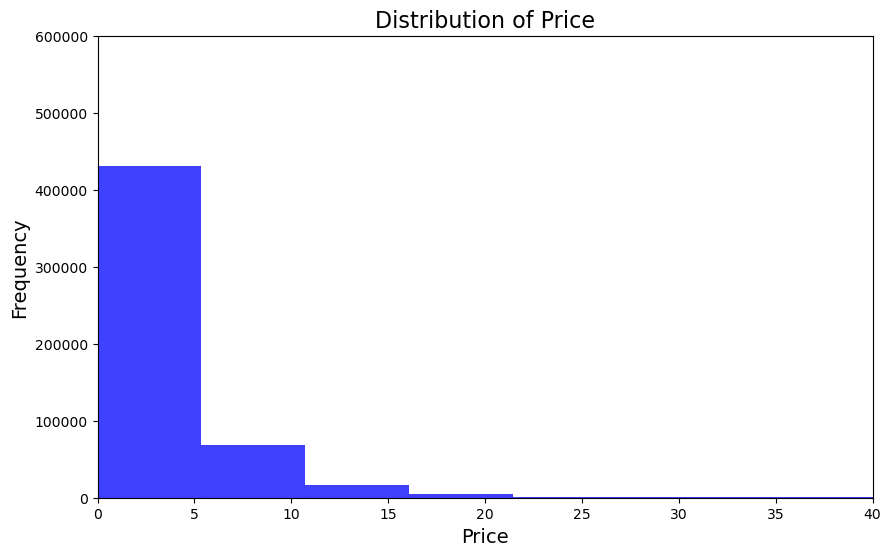

In [206]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=False, bins=10000, color='blue', edgecolor='black')
plt.title('Distribution of Price', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(0,40)          # Not much to see beyond this
plt.ylim(0,600000)
plt.show()

- [x] **Filter out price values between 0 and 100**

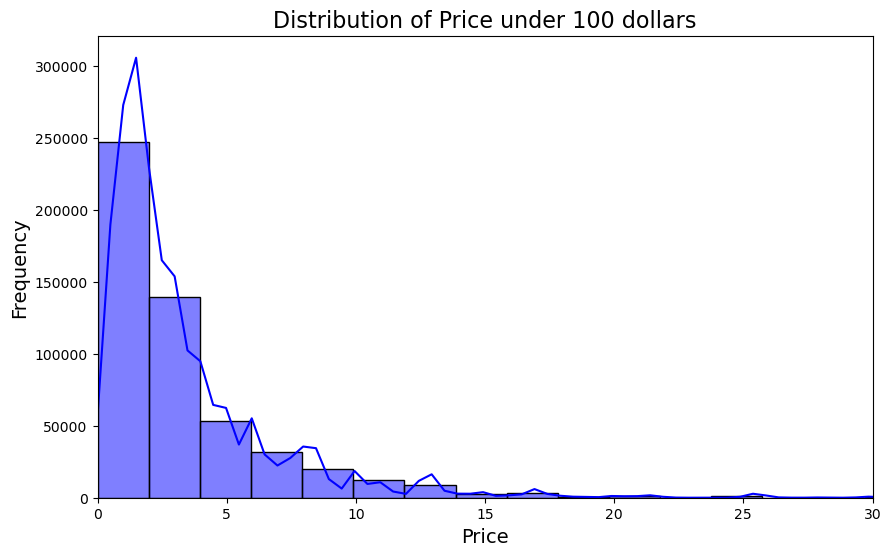

In [208]:
df_filtered_prices = df[df['Price'] < 100]

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered_prices['Price'], kde=True, bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Price under 100 dollars', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(0,30)   # There is not much to see beyond this
plt.show()

# The data is still very dominant towards low prices

- [x] **Create a stacked distribution of prices for the products with stock code of 5 digits, version A and version B.**

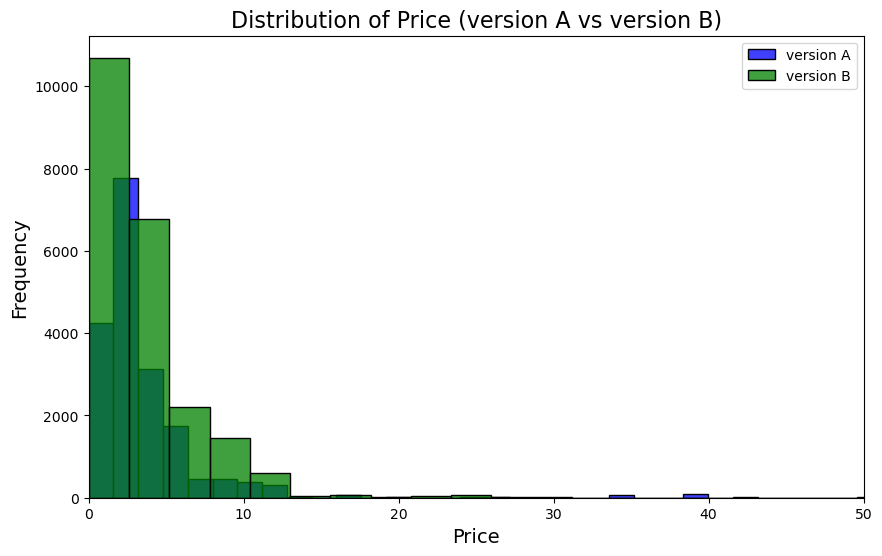

In [210]:
# Let's limit the price to the range (0-50), also remove the kde line

plt.figure(figsize=(10, 6))
sns.histplot(stock_df_vA['Price'], kde=False, bins=50, color='blue', edgecolor='black', label="version A", multiple="stack")
sns.histplot(stock_df_vB['Price'], kde=False, bins=50, color='green', edgecolor='black', label="version B", multiple="stack")
plt.title('Distribution of Price (version A vs version B)', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(0,50)
plt.legend()
plt.show()


# So, products of version be are being more sold than the products from version A.


- [x] **Create a histogram to see the distribution of the quantity column.**

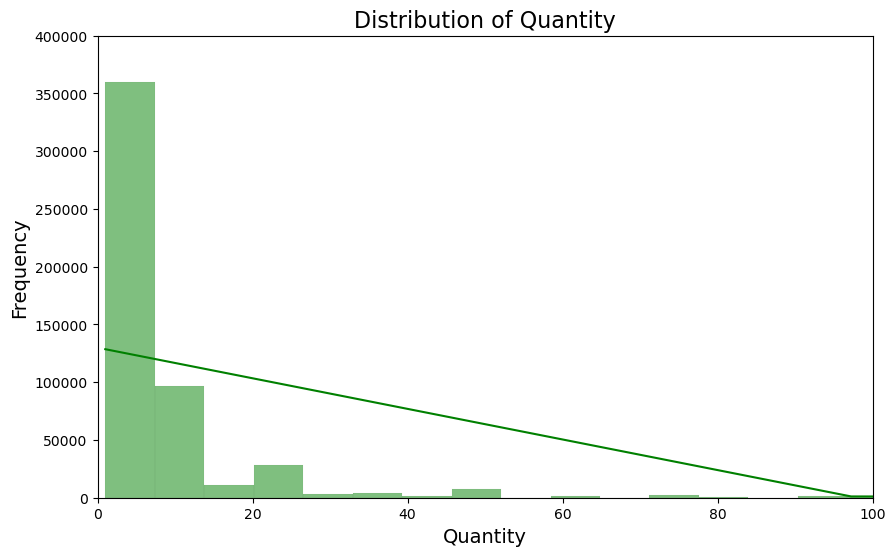

In [212]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], kde=True, bins=3000, color='green', edgecolor='black')
plt.title('Distribution of Quantity', fontsize=16)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(0,100)
plt.ylim(0,400000)
plt.show()

- [x] **Create a box plot of the prices for products with version A and B in a tight layout.**

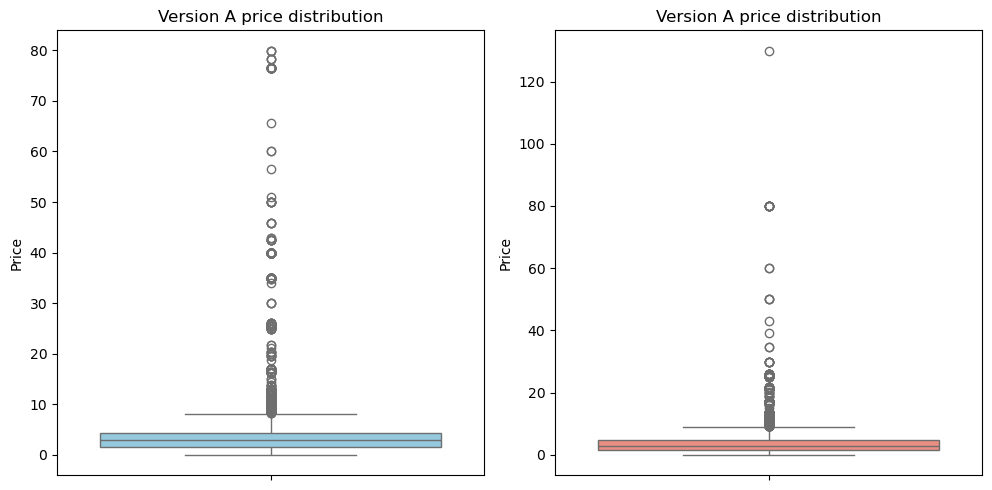

In [244]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(data=stock_df_vA["Price"], color='skyblue')
plt.title("Version A price distribution")
plt.xlabel("")
plt.ylabel("Price")

plt.subplot(1,3,2)
sns.boxplot(data=stock_df_vB["Price"], color='salmon')
plt.title("Version A price distribution")
plt.xlabel("")
plt.ylabel("Price")

plt.tight_layout()
plt.show()

# Many outliers exist, this will need fixing later

- [x] **Filter out quantity values between 0 and 100**

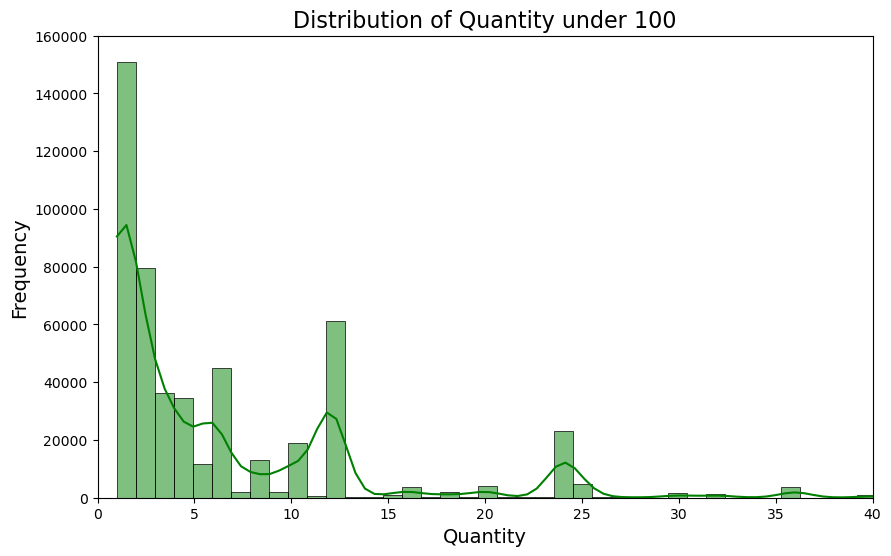

In [187]:
df_filtered_quant = df[df['Quantity'] < 100]


plt.figure(figsize=(10, 6))
sns.histplot(df_filtered_quant['Quantity'], kde=True, bins=100, color='green', edgecolor='black')
plt.title('Distribution of Quantity under 100', fontsize=16)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(0,40)
plt.ylim(0,160000)
plt.show()

# The data is still very dominant towards low quantity

- [x] **Create a stacked distribution of quantity for the products with stock code of 5 digits, version A and version B.**

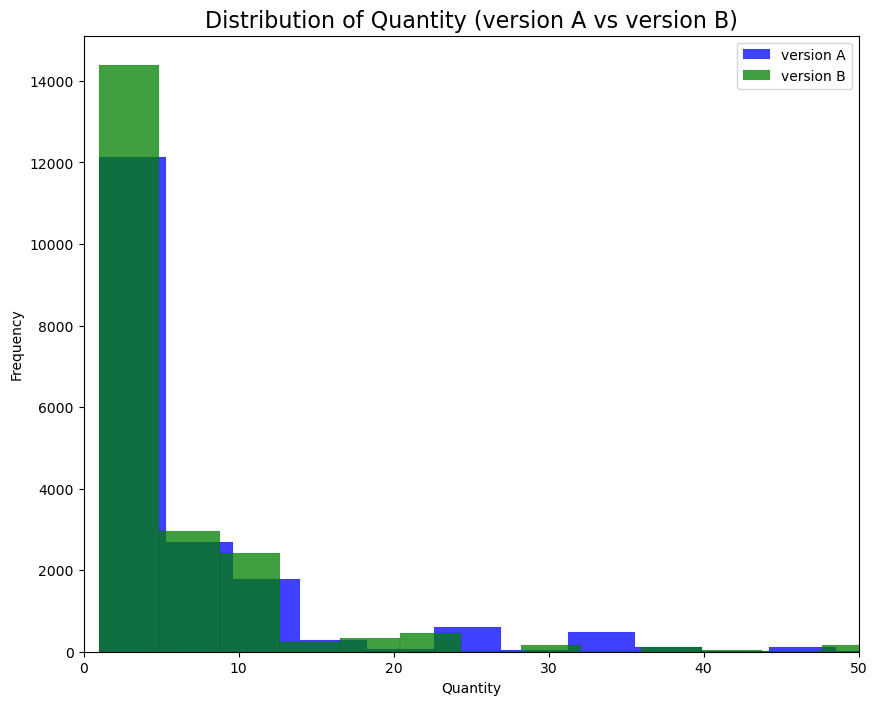

In [126]:
# Quantities for version A and version B

plt.figure(figsize=(10,8))
sns.histplot(data=stock_df_vA["Quantity"], bins=1000,edgecolor='black',label="version A", kde=False,color="blue",multiple="stack")
sns.histplot(data=stock_df_vB["Quantity"], bins=1000,edgecolor='black',label="version B", kde=False,color="green",multiple="stack")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.title('Distribution of Quantity (version A vs version B)', fontsize=16)
plt.xlim(0,50)
plt.legend()
plt.show()


- The analysis of both quantity and price distributions reveals that 'Version B' products are characterized by higher quantities and lower prices, suggesting a higher demand and thus higher transactional volume.

- The higher quantity of 'Version B' products likely reflects a strategic stocking decision to meet this anticipated demand. Conversely, 'Version A' products, with their (slightly) higher prices, are present in (slightly) lower quantities, potentially indicating lower demand. 

- [x] **Create a bar chart to see the distribution of the country column**

C:\Users\micro\AppData\Local\Temp\ipykernel_15440\1275170762.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


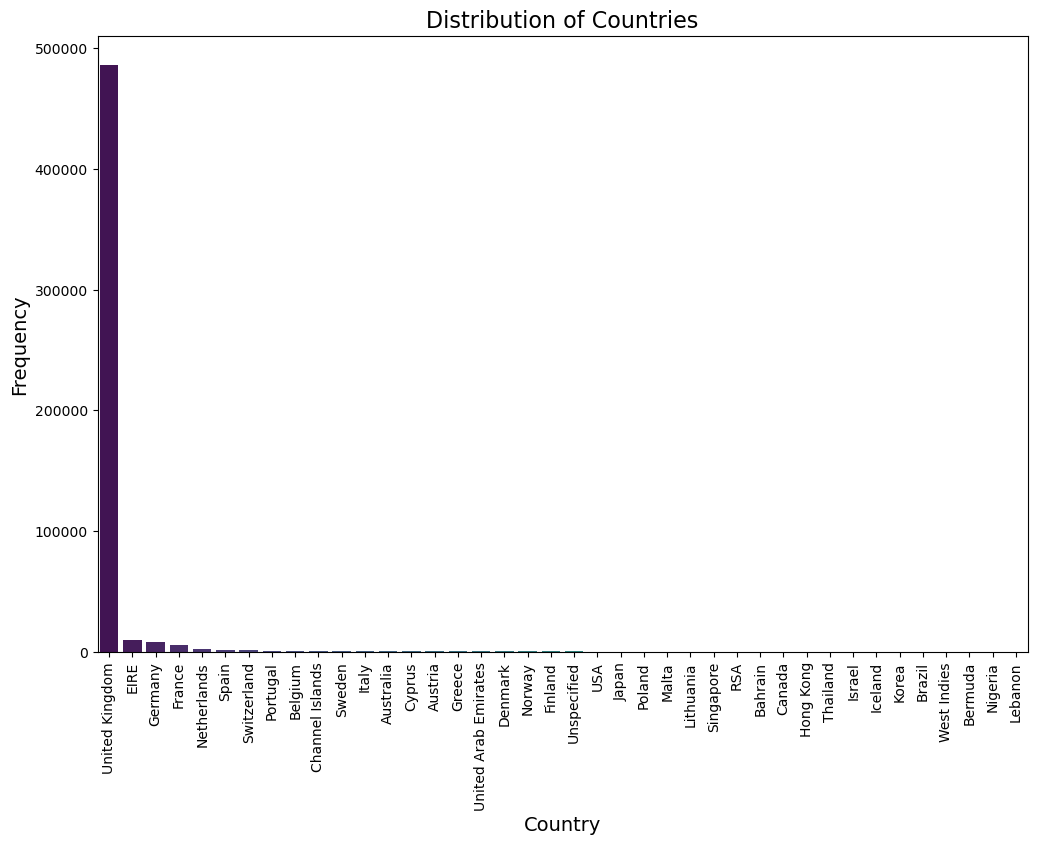

In [80]:
plt.figure(figsize=(12, 8))
country_counts = df['Country'].value_counts()
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title('Distribution of Countries', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=90)  # Rotate country names for better visibility
plt.show()

- [x] **Remove United Kingdom to have a better visibility of the other countries**

C:\Users\micro\AppData\Local\Temp\ipykernel_15440\997712466.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


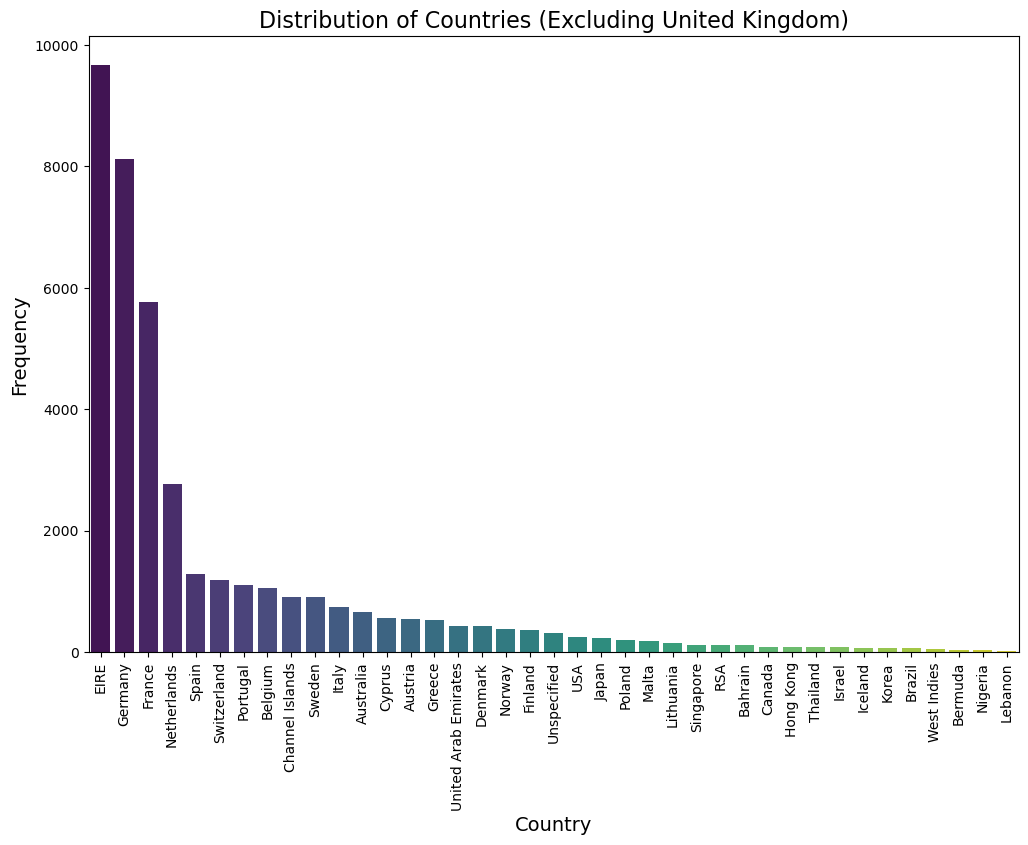

In [105]:
df_no_uk = df[df['Country'] != 'United Kingdom']

plt.figure(figsize=(12, 8))
country_counts = df_no_uk['Country'].value_counts()
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title('Distribution of Countries (Excluding United Kingdom)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=90)  
plt.show()


# Data Science (Using the Pandas Library)

## 5. Inferential Statistics

- [x] **Create a correlation matrix for the quantity, country, and price columns.**

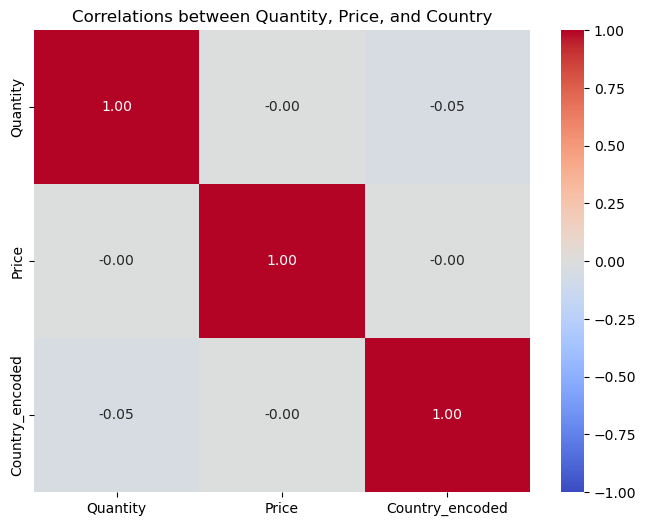

In [189]:
from sklearn.preprocessing import LabelEncoder

# Start by encoding the categorical data in "Country"

encoder = LabelEncoder()
df['Country_encoded'] = encoder.fit_transform(df['Country'])

df_corr = df[['Quantity', 'Price', 'Country_encoded']]

correlation_matrix = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlations between Quantity, Price, and Country")
plt.show()

# There doesn't seen to be any linear relationship between these 3

- [x] **Use a $\chi^2$ test to check if Country and Revenue Class (high/low revenue) are related.**

- $H_0$: There is no association between the "Country" and "Revenue Class" variables.

- $H_a$: There is an association between the "Country" and "Revenue Class" variables.

In [36]:
# The revenue class will be defined as follows:

median_price = df['Price'].median()
df['Revenue Class'] = np.where(df['Price'] > median_price, 'High', 'Low')
# df['Revenue Class'].value_counts()

from scipy.stats import chi2_contingency
import pandas as pd

contingency_table = pd.crosstab(df['Country'], df['Revenue Class'])

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")


Chi-Square Statistic: 1200.5006927843062, p-value: 1.925075304458458e-226


- The p-value (probability of seeing the data if there were no association between the variables) is very low, hence, we reject the null hypothesis.
- This result means that different countries exhibit different patterns in terms of high and low revenue transactions, subsequently suggesting that pricing strategies, product offerings, or customer demographics may vary across different countries.

- [x] **Use the Pearson/Spearman test to check if the quantity and price columns are related.**

- $H_0$: There is no association between the "Quantity" and "Price" variables.

- $H_a$: There is an association between the "Quantity" and "Price" variables.

In [7]:
from scipy.stats import pearsonr, spearmanr

pearson_corr, p_value_pearson = pearsonr(df['Quantity'], df['Price'])
spearman_corr, p_value_spearman = spearmanr(df['Quantity'], df['Price'])

print(f"Pearson Correlation: {pearson_corr}, p-value: {p_value_pearson}")
print(f"Spearman Correlation: {spearman_corr}, p-value: {p_value_spearman}")


Pearson Correlation: -0.0019313304222704146, p-value: 0.1615150930209265
Spearman Correlation: -0.41273051170476943, p-value: 0.0


- In this case, we fail to reject $H_0$ for the linear relationship between the two variables, and we reject $H_0$ for the Spearman correlation as there is a statistically significant monotonic relationship between "Quantity" and "Price."

- While there's no significant linear relationship between quantity and price (Pearson), there is a statistically significant moderate negative monotonic relationship (Spearman). This suggests that price and quantity are related, but not in a straight line.

- Quantity discounts can be implemented, or price increases can be implemented on items that are sold in very low quantities.

- [x] **Use a t-test to compare the average price of purchases between two specific countries.**

- $H_0$: There is no difference in the mean prices of products sold in the United Kingdom and Germany.

- $H_a$: There is a difference in the mean prices of products sold in the United Kingdom and Germany.

In [9]:
from scipy.stats import ttest_ind

country_A = df[df['Country'] == 'United Kingdom']['Price']
country_B = df[df['Country'] == 'Germany']['Price']

t_stat, p_value = ttest_ind(country_A, country_B, equal_var=False)
print(f"T-Test Statistic: {t_stat}, p-value: {p_value}")



T-Test Statistic: 3.188886174859296, p-value: 0.001429015429220004


- The p-value (0.001429) is much less than 0.05. This means that the difference in mean prices between the United Kingdom and Germany is statistically significant, hence, we reject $H_0$.

- This finding suggests that pricing strategies or product offerings may vary between these two countries.

- [x] **Use an ANOVA test to check whether average quantity differs across multiple countries.**

- $H_0$: There is no difference in the mean quantities of products sold in the United Kingdom, Germany, and France.

- $H_a$: At least one of the countries has a different mean quantity compared to the others.

In [11]:
from scipy.stats import f_oneway

countries = ['United Kingdom', 'Germany', 'France']
samples = [df[df['Country'] == country]['Quantity'] for country in countries]

f_stat, p_value = f_oneway(*samples)
print(f"ANOVA Statistic: {f_stat}, p-value: {p_value}")



ANOVA Statistic: 12.445047853574398, p-value: 3.938392352081043e-06


- The p-value (3.938e-06) is much less than 0.05. This means that there is a statistically significant difference in the mean quantities of products sold in the United Kingdom, Germany, and France, hence, we reject $H_0$.

- At least one of the countries has a different mean quantity compared to the others. It does not tell us which countries are different, only that a difference exists.

- [x] **Store the outliers of the data in the version A and B stock dataframes by using the typical interquartile range.**

In [259]:
# Outliers are defined as prices that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

Q1_A = stock_df_vA["Price"].quantile(0.25)
Q3_A = stock_df_vA["Price"].quantile(0.75)

IQR_A = Q3_A - Q1_A

out_A_df = stock_df_vA[(stock_df_vA["Price"] < Q1_A - 1.5 * IQR_A) | (stock_df_vA["Price"] > Q3_A + 1.5 * IQR_A)]

Q1_B = stock_df_vB["Price"].quantile(0.25)
Q3_B = stock_df_vB["Price"].quantile(0.75)

IQR_B = Q3_B - Q1_B

out_B_df = stock_df_vB[(stock_df_vB["Price"] < Q1_B - 1.5 * IQR_B) | (stock_df_vB["Price"] > Q3_B + 1.5 * IQR_B)]

out_A_df.describe()

# We will need these later for the KMeans clustering

,Quantity,Invoice_Date,Price,Customer_ID,Date
count,1500.000000,1500,1500.00000,684.000000,1500
mean,2.193333,2010-05-19 03:32:33.200000,16.21730,15441.248538,2010-05-18 13:56:09.600000
min,1.000000,2009-12-01 10:59:00,8.24000,12349.000000,2009-12-01 00:00:00
25%,1.000000,2010-02-03 05:34:00,8.95000,14051.250000,2010-02-02 18:00:00
50%,1.000000,2010-05-13 18:08:00,11.02000,15318.500000,2010-05-13 00:00:00
75%,2.000000,2010-08-19 13:28:00,12.75000,16984.000000,2010-08-19 00:00:00
max,85.000000,2010-12-09 14:09:00,79.95000,18268.000000,2010-12-09 00:00:00
std,4.924103,NaN,13.81267,1738.270550,NaN


## 6. Linear Regression

- [x] **Use a linear regression model to check if there is a linear relationship between quantity and price**

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

X = df[['Quantity']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("R2 Score:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


R2 Score: 2.2433633166674127e-06
MAE: 4.504184322449438
MSE: 7009.1057714991675
RMSE: 83.72040236106828


### Model's results

- As we can see, the $R^2$ score is close to 0, indicating that Quantity doesn't explain Price well.

- The MAE, MSE, and RMSE values suggest large prediction errors, meaning the model is not reliable.

- A linear regression isn't suitable due to the weak relationship. Non-linear models (e.g., polynomial regression, decision trees) should perform better.

## 7. Logistic Regression

- [x] **If you want to classify countries into "high revenue" vs "low revenue" using the quantity, country, and price columns to predict the revenue class.**

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Country_encoded'] = encoder.fit_transform(df['Country'])

X = df[['Country_encoded','Price','Quantity']]  
y = df['Revenue Class']      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00     50442
         Low       1.00      1.00      1.00     54651

    accuracy                           1.00    105093
   macro avg       1.00      1.00      1.00    105093
weighted avg       1.00      1.00      1.00    105093



### Model's conclusions

- The model achieves near perfect precision, which we should always keep an eye out for
- It is perfectly identifying both "High" and "Low" revenue classes with no false positives or false negatives.
- Both the macro and weighted averages are 1.00, meaning that the model is performing equally well across both classes without being biased toward one.

## 8. KMeans Clustering

- [x] **Create a dataframe with the outlier dataframes created before for versions A and B of the products and do a KMeans clustering model to check the seperation between them.**

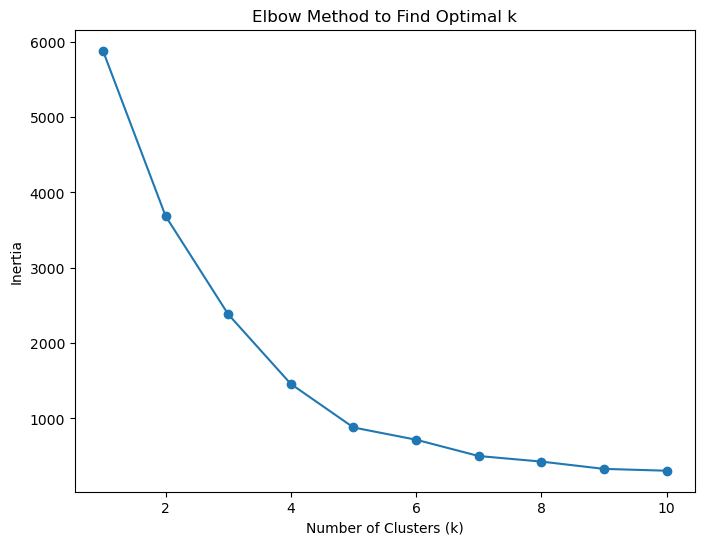

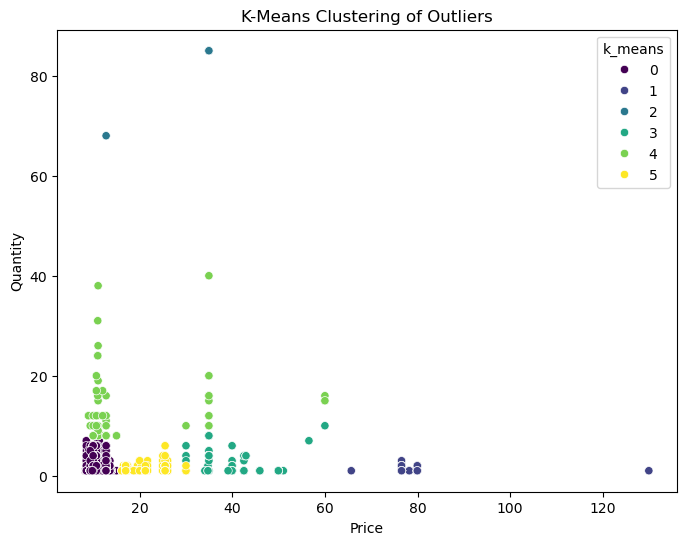

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

combined_outliers = pd.concat([out_A_df, out_B_df])

X = combined_outliers[['Price', 'Quantity']]

scaler = StandardScaler()
X = scaler.fit_transform(X)

inertia = []
for k in range(1, 11):
    k_m = KMeans(n_clusters=k, random_state=42)
    k_m.fit(X)
    inertia.append(k_m.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal k')
plt.show()

k_m = KMeans(n_clusters=6, random_state=42)  # the elbow seems to be at k=6
k_m.fit(X)

combined_outliers['k_means'] = k_m.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(data=combined_outliers, x='Price', y='Quantity', hue='k_means', palette='viridis')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('K-Means Clustering of Outliers')
plt.show()


- [x] **Use a silhouette score to check if the clusters are well seperated enough.**

In [274]:
from sklearn.metrics import silhouette_score

labels = k_m.fit_predict(X)
silhouette_avg = silhouette_score(X, labels)

print(f"Silhouette Score (k=6): {silhouette_avg}")

Silhouette Score (k=6): 0.6239497656636307


### Model's conclusions

- K-Means effectively clustered outliers based on Price and Quantity, and a silhouette score of 0.62 indicates acceptable cluster separation.

## 9. Time Series and Forecasting

- [x] **Set the column Date as the index.**

In [137]:
df.set_index('Date', inplace=True)

df.sort_index(inplace=True)

- [x] **Visualize Price trends over time**

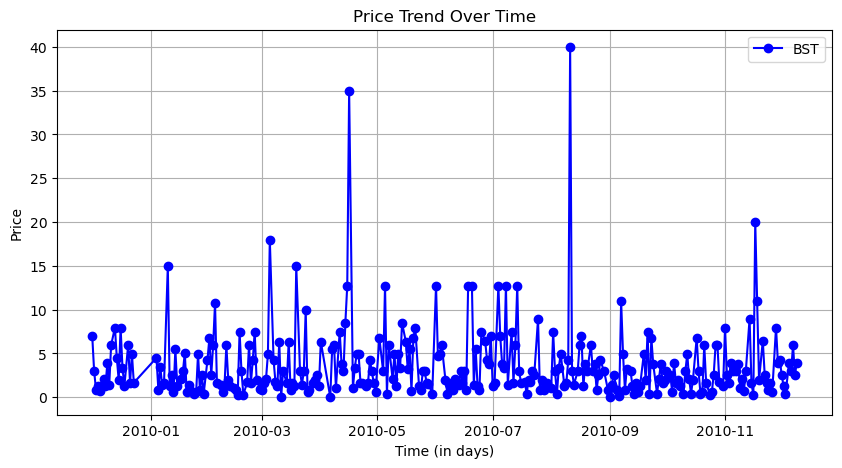

In [183]:
# plt.figure(figsize=(10, 5))
# plt.plot(df.index, df["Price"], marker="o", linestyle="-", color="b", label="BST")
# plt.xlabel("Time (in days)")
# plt.ylabel("Price")
# plt.title("Price Trend Over Time")
# plt.legend()
# plt.grid()
# plt.show()

# There are some nasty outliers in the data, let's remove all outliers that have a price above 1000

df_filtered = df[df['Price'] <= 50]

df_filtered = df_filtered.sort_index()  # Ensure data is sorted by date
df_filtered = df_filtered[~df_filtered.index.duplicated(keep='first')]



plt.figure(figsize=(10, 5))
plt.plot(df_filtered.index, df_filtered["Price"], marker="o", linestyle="-", color="b", label="BST")
plt.xlabel("Time (in days)")
plt.ylabel("Price")
plt.title("Price Trend Over Time")
plt.legend()
plt.grid()
plt.show()

- [x] **Check for Seasonality**

C:\Users\micro\AppData\Local\Temp\ipykernel_15440\3106934999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Price_rolling"] = df_filtered["Price"].rolling(window=7, center=True).mean()


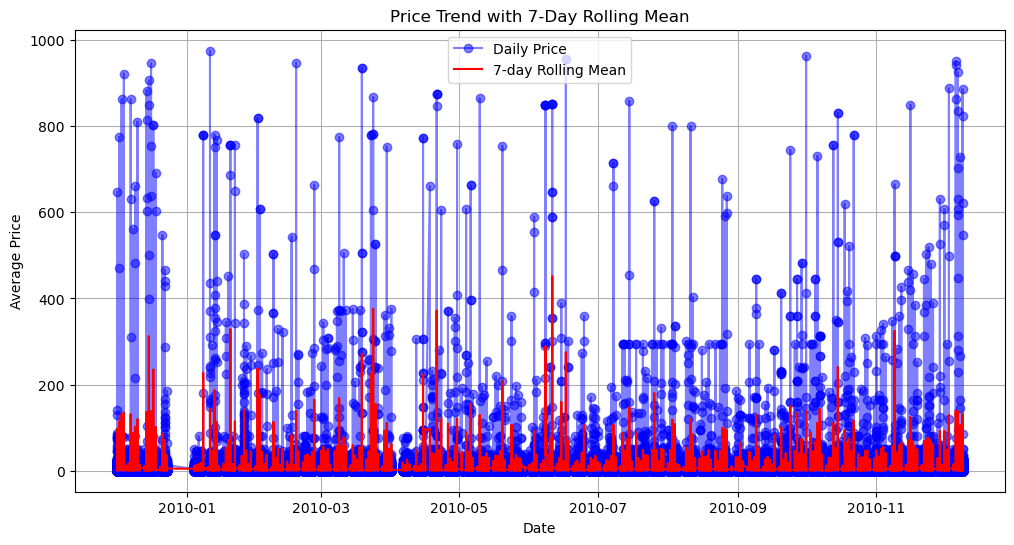

In [159]:
df_filtered["Price_rolling"] = df_filtered["Price"].rolling(window=7, center=True).mean()

plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, df_filtered["Price"], marker="o", linestyle="-", 
         alpha=0.5, label="Daily Price", color="blue")
plt.plot(df_filtered.index, df_filtered["Price_rolling"], linestyle="-", 
         color="red", label="7-day Rolling Mean")
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.title("Price Trend with 7-Day Rolling Mean")
plt.legend()
plt.grid()
plt.show()

- [x] **Check for Stationarity**

In [185]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df_filtered["Price"])
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

# It is stationary (p-value < 0,05), so we don't need to apply differencing, however, I'll leave it here:

# df["BST_diff"] = df["BST"].diff().dropna()

# Since the p-value is very low, we can reject the null hypothesis

ADF Statistic: -16.38292920256493
p-value: 2.740407082440017e-29


- [x] **Perform a seasonality decomposition**

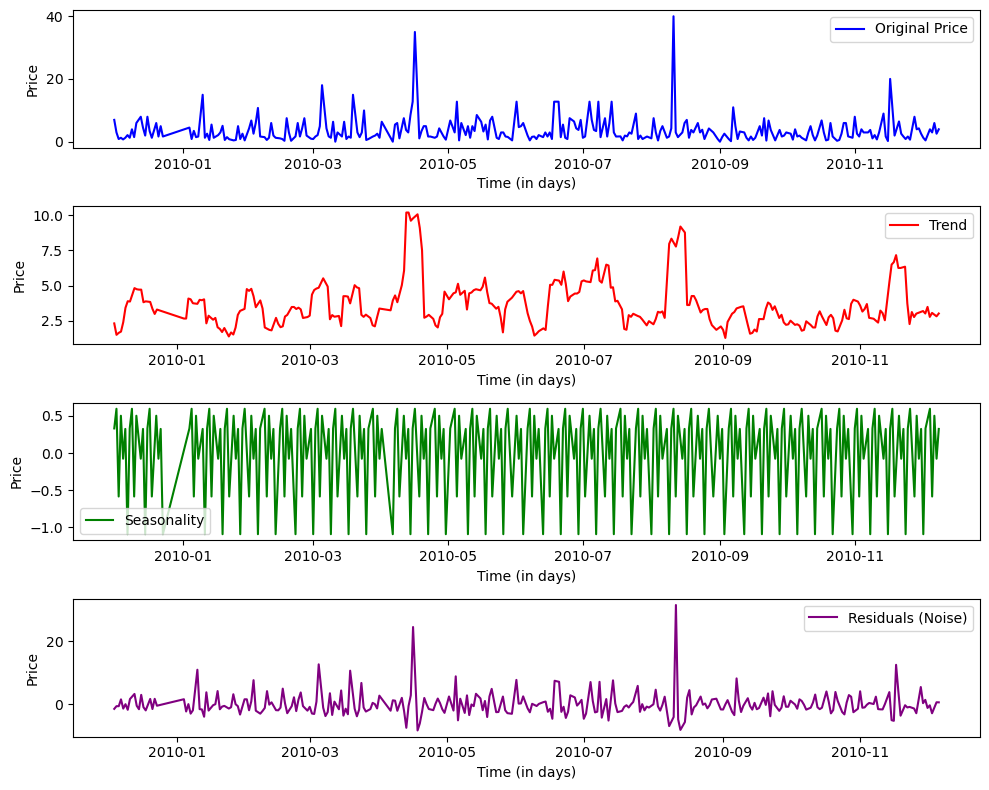

In [187]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


decomposition = seasonal_decompose(df_filtered["Price"], model="additive", period=7)  # period=7 for weekly seasonality


plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(df_filtered.index, df_filtered["Price"], label="Original Price", color="blue")
plt.xlabel("Time (in days)")
plt.ylabel("Price")
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label="Trend", color="red")
plt.xlabel("Time (in days)")
plt.ylabel("Price")
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label="Seasonality", color="green")
plt.xlabel("Time (in days)")
plt.ylabel("Price")
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label="Residuals (Noise)", color="purple")
plt.xlabel("Time (in days)")
plt.ylabel("Price")
plt.legend()

plt.tight_layout()
plt.show()

- [x] **Try the ARIMA model**

C:\Users\micro\ansel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\micro\ansel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\micro\ansel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


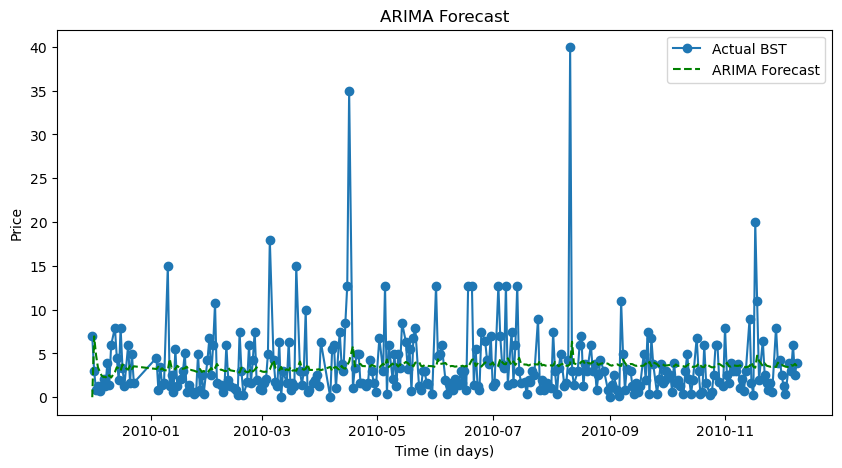

In [189]:
from statsmodels.tsa.arima.model import ARIMA

# Define the model (p,d,q) -> Use (1,1,1) as a start
model = ARIMA(df_filtered["Price"], order=(1, 1, 1))
fit = model.fit()

df_filtered["Price_ARIMA"] = fit.fittedvalues

plt.figure(figsize=(10, 5))
plt.plot(df_filtered.index, df_filtered["Price"], label="Actual BST", marker="o")
plt.plot(df_filtered.index, df_filtered["Price_ARIMA"], label="ARIMA Forecast", linestyle="--", color="green")
plt.legend()
plt.xlabel("Time (in days)")
plt.ylabel("Price")
plt.title("ARIMA Forecast")
plt.show()

- [x] **Try the SARIMA model**

C:\Users\micro\ansel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\micro\ansel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


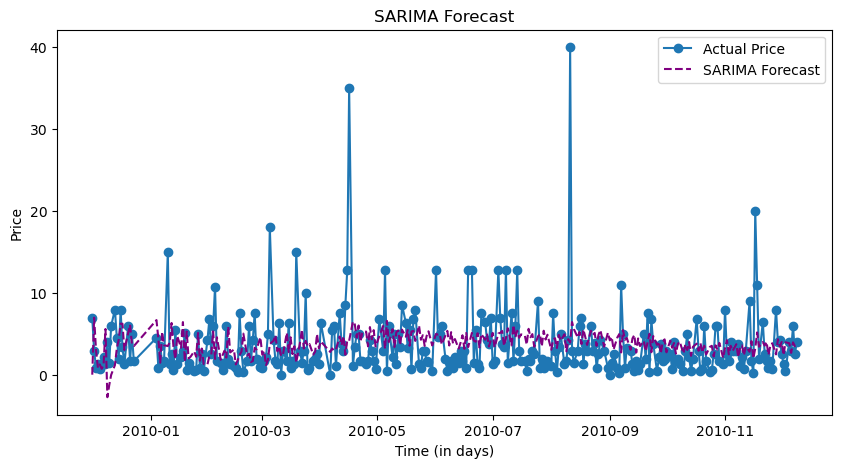

In [191]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA model (p,d,q) x (P,D,Q,s) where s = seasonal period
model = SARIMAX(df_filtered["Price"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
fit = model.fit()

df_filtered["Price_SARIMA"] = fit.fittedvalues

plt.figure(figsize=(10, 5))
plt.plot(df_filtered.index, df_filtered["Price"], label="Actual Price", marker="o")
plt.plot(df_filtered.index, df_filtered["Price_SARIMA"], label="SARIMA Forecast", linestyle="--", color="purple")
plt.legend()
plt.xlabel("Time (in days)")
plt.ylabel("Price")
plt.title("SARIMA Forecast")
plt.show()


- [x] **Try the Exponential Smoothing model**

C:\Users\micro\ansel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


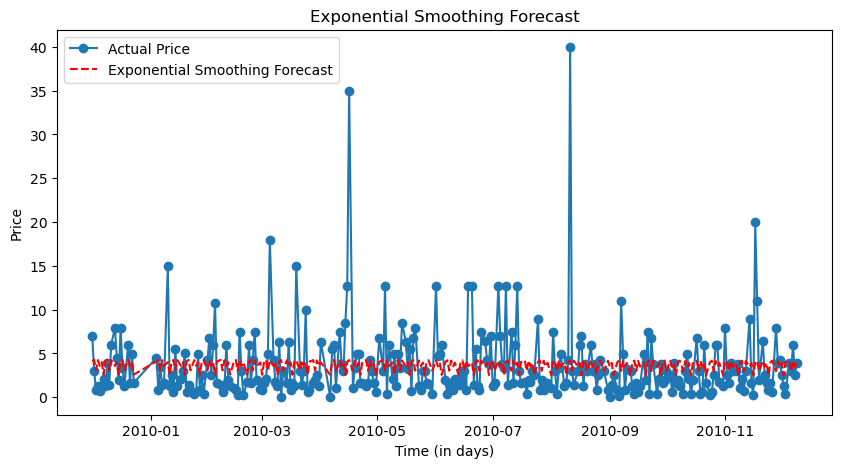

In [195]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(df_filtered["Price"], trend="add", seasonal="add", seasonal_periods=7)
fit = model.fit()
df_filtered["Price_forecast"] = fit.fittedvalues

plt.figure(figsize=(10, 5))
plt.plot(df_filtered.index, df_filtered["Price"], label="Actual Price", marker="o")
plt.plot(df_filtered.index, df_filtered["Price_forecast"], label="Exponential Smoothing Forecast", linestyle="--", color="red")
plt.legend()
plt.xlabel("Time (in days)")
plt.ylabel("Price")
plt.title("Exponential Smoothing Forecast")
plt.show()

- [] **Predict future values for the next 50 days using the most appropriate model.**

In [222]:
from statsmodels.tsa.arima.model import ARIMA

df_filtered = df_filtered.dropna(subset=["Price"]) 

model = ARIMA(df_filtered["Price"], order=(1, 0, 1)) # p,d,q 
fit = model.fit()

print(fit.summary())  

forecast = fit.forecast(steps=50)
print(forecast)  

last_date = df_filtered.index[-1]
print(last_date)
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq="D") # Generate future dates (30 days ahead)
future_df = pd.DataFrame({"Predicted_Price": forecast}, index=future_dates)

print(future_df.head())

# This future dataset is creating NaN values


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  307
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -875.534
Date:                Tue, 01 Apr 2025   AIC                           1759.068
Time:                        20:29:43   BIC                           1773.975
Sample:                             0   HQIC                          1765.029
                                - 307                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6454      0.402      9.061      0.000       2.857       4.434
ar.L1         -0.2314      1.089     -0.213      0.832      -2.366       1.903
ma.L1          0.3009      1.105      0.272      0.7

C:\Users\micro\ansel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\micro\ansel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\micro\ansel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\micro\ansel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\micro\ansel

- [] **Plot the prediction**

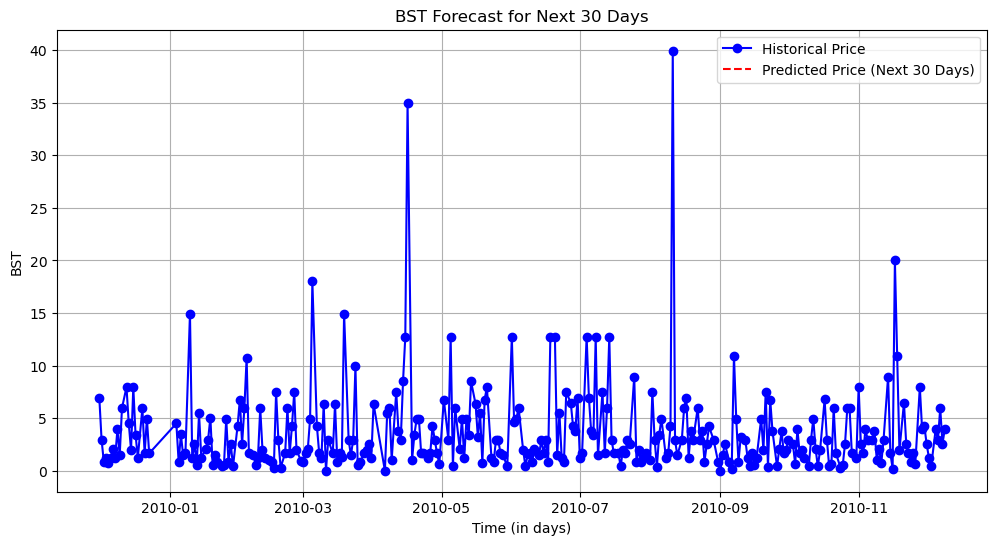

In [199]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, df_filtered["Price"], label="Historical Price", marker="o", color="blue")
plt.plot(future_df.index, future_df["Predicted_BST"], label="Predicted Price (Next 30 Days)", linestyle="--", color="red")
plt.xlabel("Time (in days)")
plt.ylabel("BST")
plt.title("BST Forecast for Next 30 Days")
plt.legend()
plt.grid()

plt.show()


# From this we can extrapolate that the arima model is overfitting or underfitting (flat prediction values)
# Also, since the series is stationary, the model doesn't have much "trend" or "seasonality" to pick up on, leading to predictions that just hover around a constant mean value.


# We can experiment with different values for (p,d,q) or change the model

# Transfering the data to MySQL

- [x] **Save the original dataset with fixed columns**

In [ ]:
df = pd.read_csv("online_retail.csv")

df.rename(columns={"": ""}, inplace=True)

df.to_csv("SQL_online_retail.csv", index=False)

# If this downloads as an xls file, go on Google and search for "xls to csv|Cloud convert" and convert that file to csv, it should work


- [x] **Save the clean dataset**

In [ ]:
df = pd.read_csv("clean_online_retail.csv")

df.rename(columns={"": ""}, inplace=True)

df.to_csv("SQL_clean_online_retail.csv", index=False)

# If this downloads as an xls file, go on Google and search for "xls to csv|Cloud convert" and convert that file to csv, it should work
